### Overview
In this notebook we will explore some data visualization and processing techniques

### Loading Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer



### Reading Dataset

In [68]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)

(27674, 83)


In [69]:
# Display the first few rows of the training dataset
#train_data.head()
print(train_data.dtypes)

#train_data

patient_id            int64
patient_race         object
payer_type           object
patient_state        object
patient_zip3          int64
                     ...   
limited_english     float64
commute_time        float64
health_uninsured    float64
veteran             float64
treatment_pd          int64
Length: 83, dtype: object


### Data Exploration and Visualization

**histplot**

**sns.histplot(train_data['treatment_pd'], bins=30)** creates a histogram plot using Seaborn to visualize the distribution of the 'treatment_pd' column from the train_data DataFrame. The x-axis represents the values in the 'treatment_pd' column, while the y-axis represents the frequency or count of these values within each bin (interval) created by specifying 30 bins. This visualization helps in understanding the distribution and frequency of values within the 'treatment_pd' column.

### Histogram for numeric data distribution analysis - Continous Data

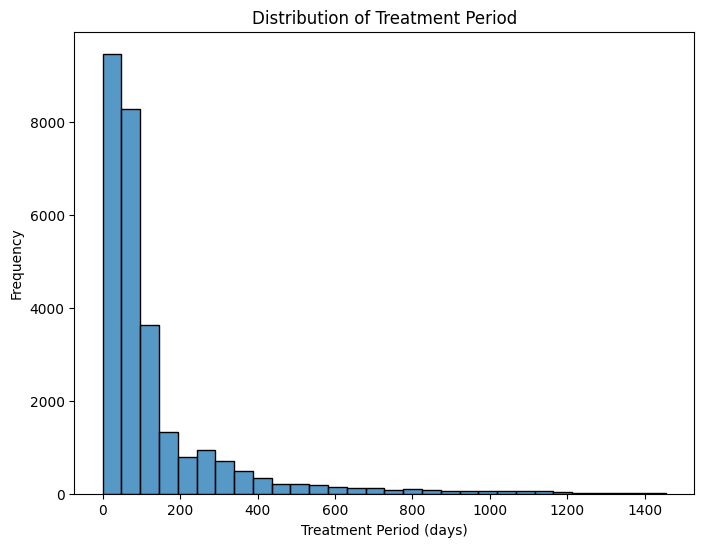

In [70]:
# Plot a histogram of the 'treatment_pd' target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_data['treatment_pd'], bins=30)
plt.xlabel('Treatment Period (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Treatment Period')
plt.show()

###Column chart for data distribution analysis - Categorical

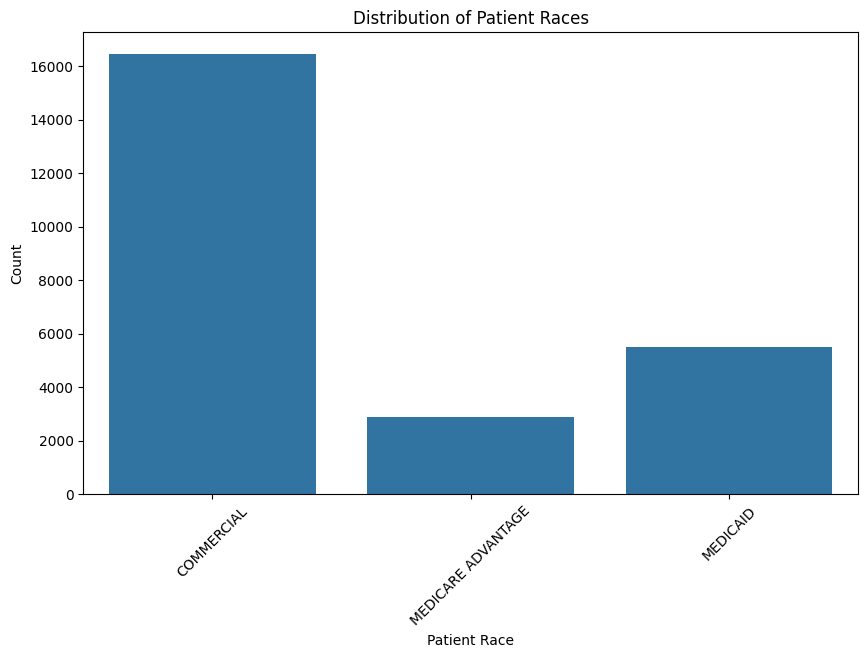

In [71]:
# Bar Plot for Categorical Variables (e.g., patient_race)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='payer_type')  #payer_type  #patient_race
plt.title("Distribution of Patient Races")
plt.xlabel("Patient Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Box Plot for outlier detection

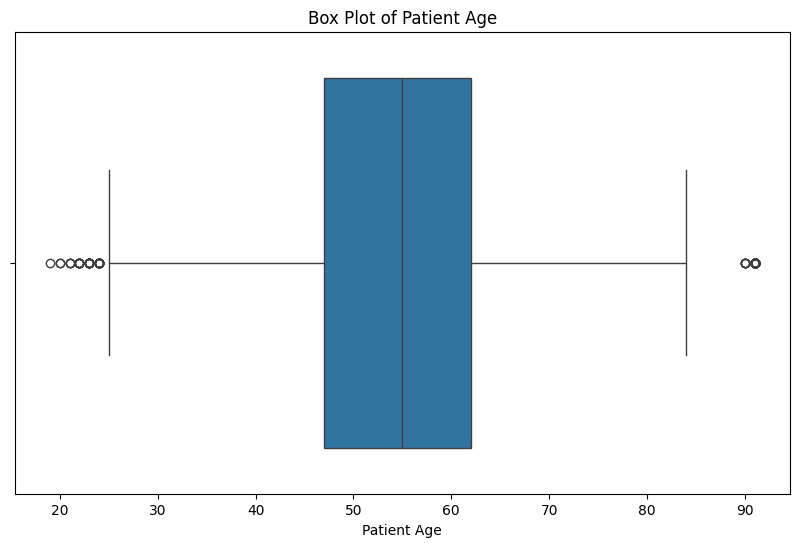

In [72]:
# Box Plot for Numeric Variables (e.g., patient_age)
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='patient_age')
plt.title("Box Plot of Patient Age")
plt.xlabel("Patient Age")
plt.show()

### Correlation matrix to analyze the relationships between numerical variables


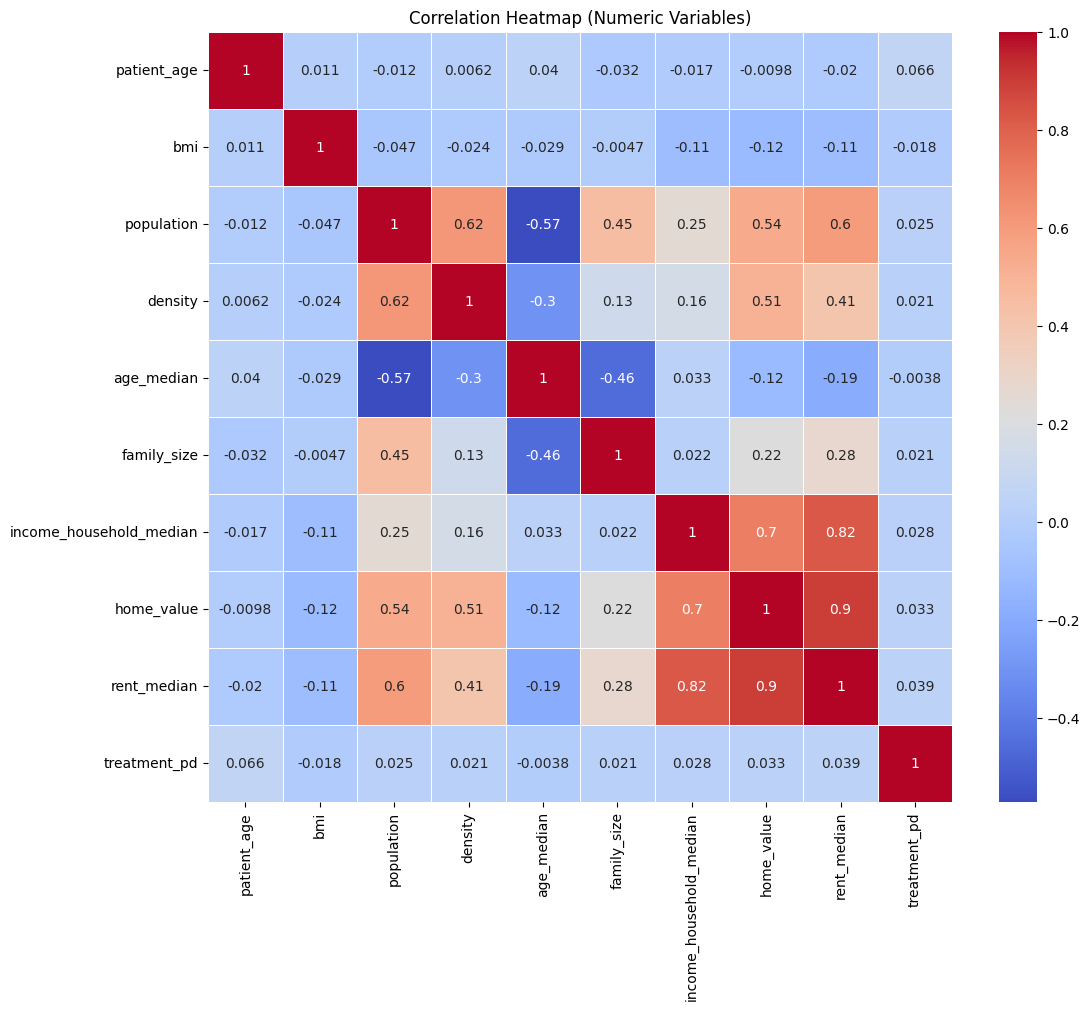

In [73]:
# Correlation Heatmap (for numeric variables)
numeric_columns = ['patient_age', 'bmi', 'population', 'density', 'age_median', 'family_size', 'income_household_median', 'home_value', 'rent_median', 'treatment_pd']
correlation_matrix = train_data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


###Scatter Plot for analyzing the relationship between two variables


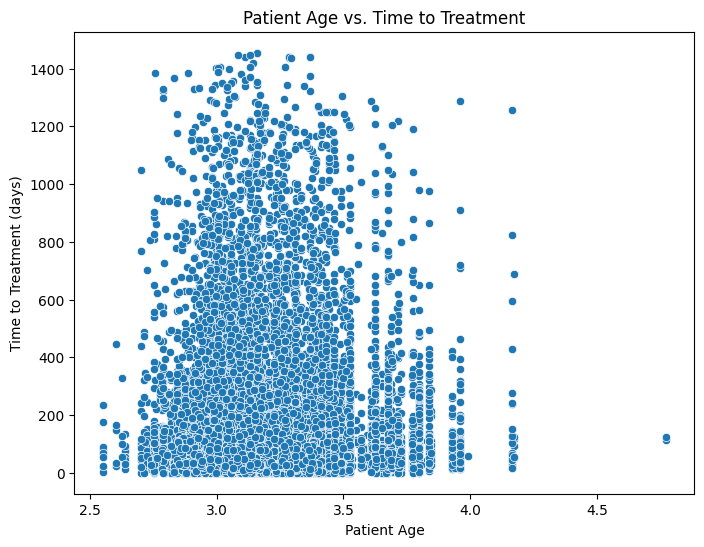

In [74]:
# Scatter Plot for Relationship: Patient Age vs. Time to Treatment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='family_size', y='treatment_pd')  #family_size #patient_age
plt.title("Patient Age vs. Time to Treatment")
plt.xlabel("Patient Age")
plt.ylabel("Time to Treatment (days)")
plt.show()

### Bar Chart to plot categorical data and check their distribution

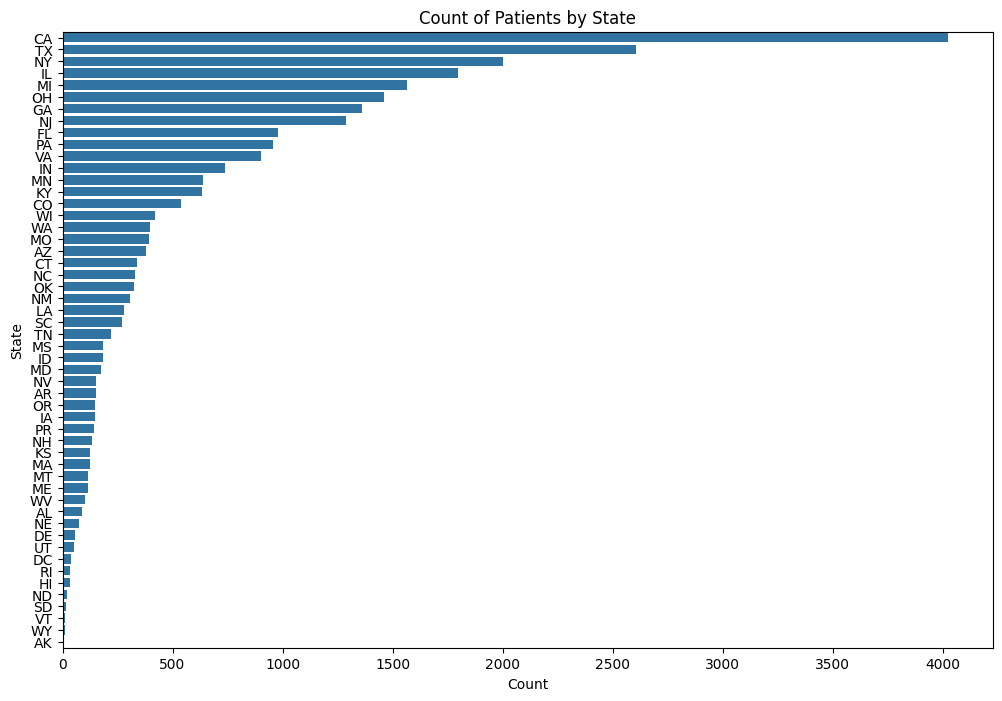

In [75]:
# Count Plot (e.g., patient_state)
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, y='patient_state', order=train_data['patient_state'].value_counts().index)
plt.title("Count of Patients by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

###Identify the number of missing values in every column

In [76]:
null_count = train_data.isnull().sum()
print('Number of null values:', null_count.all)

Number of null values: <bound method NDFrame._add_numeric_operations.<locals>.all of patient_id              0
patient_race        15152
payer_type           2836
patient_state          79
patient_zip3            0
                    ...  
limited_english         3
commute_time            0
health_uninsured        0
veteran                 0
treatment_pd            0
Length: 83, dtype: int64>


### Feature Engineering

In [77]:
# You can create new features or transform existing ones for better model performance
# Example: Calculate age at the time of diagnosis
train_data['age_at_diagnosis'] = train_data['patient_age'] - (train_data['breast_cancer_diagnosis_year'] - 2018)

### Split the data into features and target variable

In [78]:
X = train_data.drop(['treatment_pd'], axis=1)
y = train_data['treatment_pd']


###Identify numerical and categorical columns

In [79]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns



### Feature Imputation

It is very important to handle missing values. Therefore think of best possible way for imputation

// Explanation of the below code:

**SimpleImputer(strategy='median'): ** This line initializes an instance of the SimpleImputer class from Scikit-Learn. SimpleImputer is used to impute (fill in) missing values in a dataset. In this case, it's configured to use the 'median' strategy for imputation. The 'median' strategy replaces missing values with the median of the respective column.

**numerical_imputer:** This variable now holds the SimpleImputer object configured with the median strategy.

**X[numerical_cols]:** Here, X is the training DataFrame, and numerical_cols is a list of column names within X that contain numerical data and have missing values that need to be imputed.

**numerical_imputer.fit_transform(X[numerical_cols]):** This line performs the actual imputation process. It fits the imputer (numerical_imputer) to the selected numerical columns (X[numerical_cols]) and transforms those columns by replacing missing values with their respective median values. The fit_transform method both fits the imputer to the data and transforms the data in one step.

After this code is executed, missing values in the specified numerical columns (numerical_cols) within the DataFrame X will have been replaced with the median value of each respective column. This process helps in handling missing data before using the dataset for machine learning models, ensuring that all numerical features have valid values for analysis or modeling purposes.







In [80]:
# Impute missing values for numerical columns with the median
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

# Impute missing values for categorical columns with the mode (most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

#X.head()
null_count = X.isnull().sum()
print('Number of null values:', null_count)

Number of null values: patient_id          0
patient_race        0
payer_type          0
patient_state       0
patient_zip3        0
                   ..
limited_english     0
commute_time        0
health_uninsured    0
veteran             0
age_at_diagnosis    0
Length: 83, dtype: int64


In [81]:
from sklearn import preprocessing

Array = np.array(X['patient_age'])

normalized_col = preprocessing.normalize([Array])
print(normalized_col)




[[0.00497363 0.00681171 0.00573049 ... 0.00443302 0.00573049 0.00573049]]
